In [59]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-whitegrid')

df = pd.read_csv('data/wine.csv')
df['quality_ord'] = pd.cut(df['quality'], bins = [0, 5, 6, 9],
       labels = ['low', 'medium', 'high'])


In [60]:
# Apply stratified sampling for each category
df = df.groupby('quality_ord', group_keys = False).apply(lambda x: x.sample(500, random_state = 42))

df['quality_ord'].value_counts()

low       500
medium    500
high      500
Name: quality_ord, dtype: int64

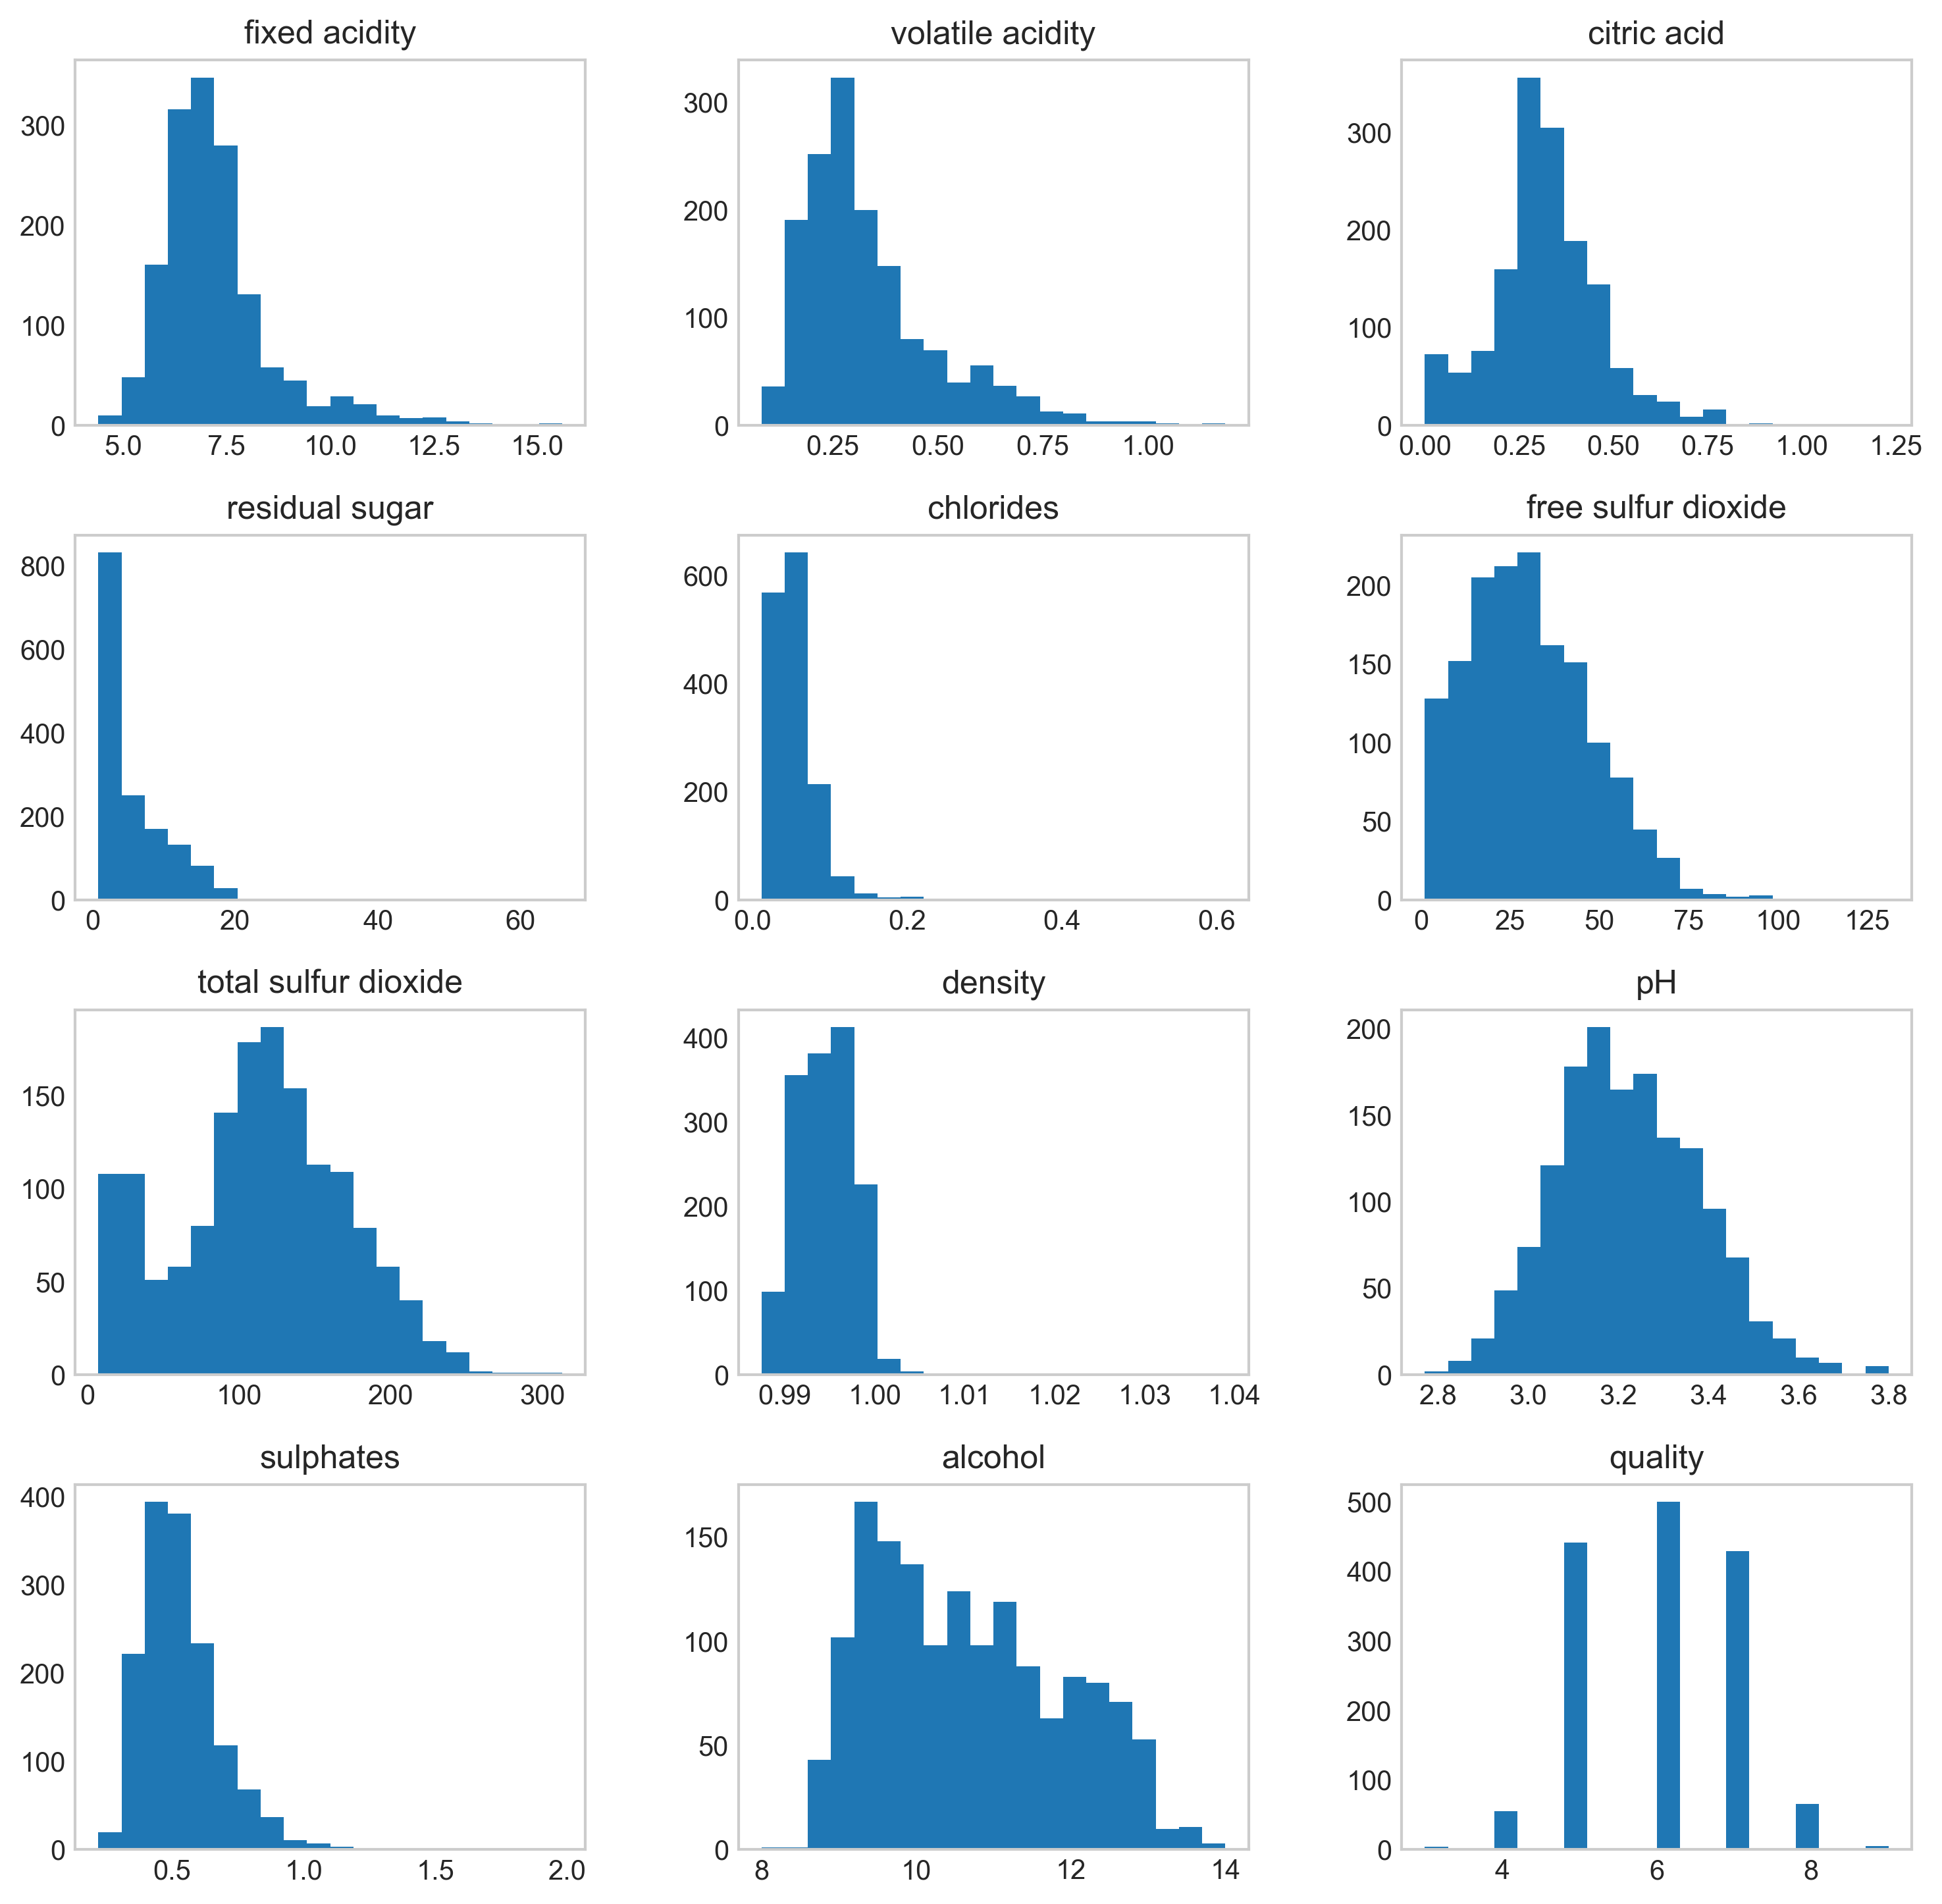

In [61]:
df.hist(figsize = (12,12), grid = False, bins = 20)

plt.show()

In [63]:
dv = 'pH'
iv = 'quality_ord'

df.groupby(iv).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_ord,,,,,,,,,,,,
low,7.3574,0.40669,0.30660,5.6656,0.065304,28.825,115.951,0.995910,3.22052,0.53298,9.878000,4.874
medium,7.2288,0.31854,0.32584,5.5392,0.053620,30.779,114.852,0.994683,3.21796,0.53432,10.602267,6.000
high,7.0675,0.28873,0.33822,4.8308,0.043720,31.015,110.855,0.993003,3.22894,0.53264,11.393420,7.152


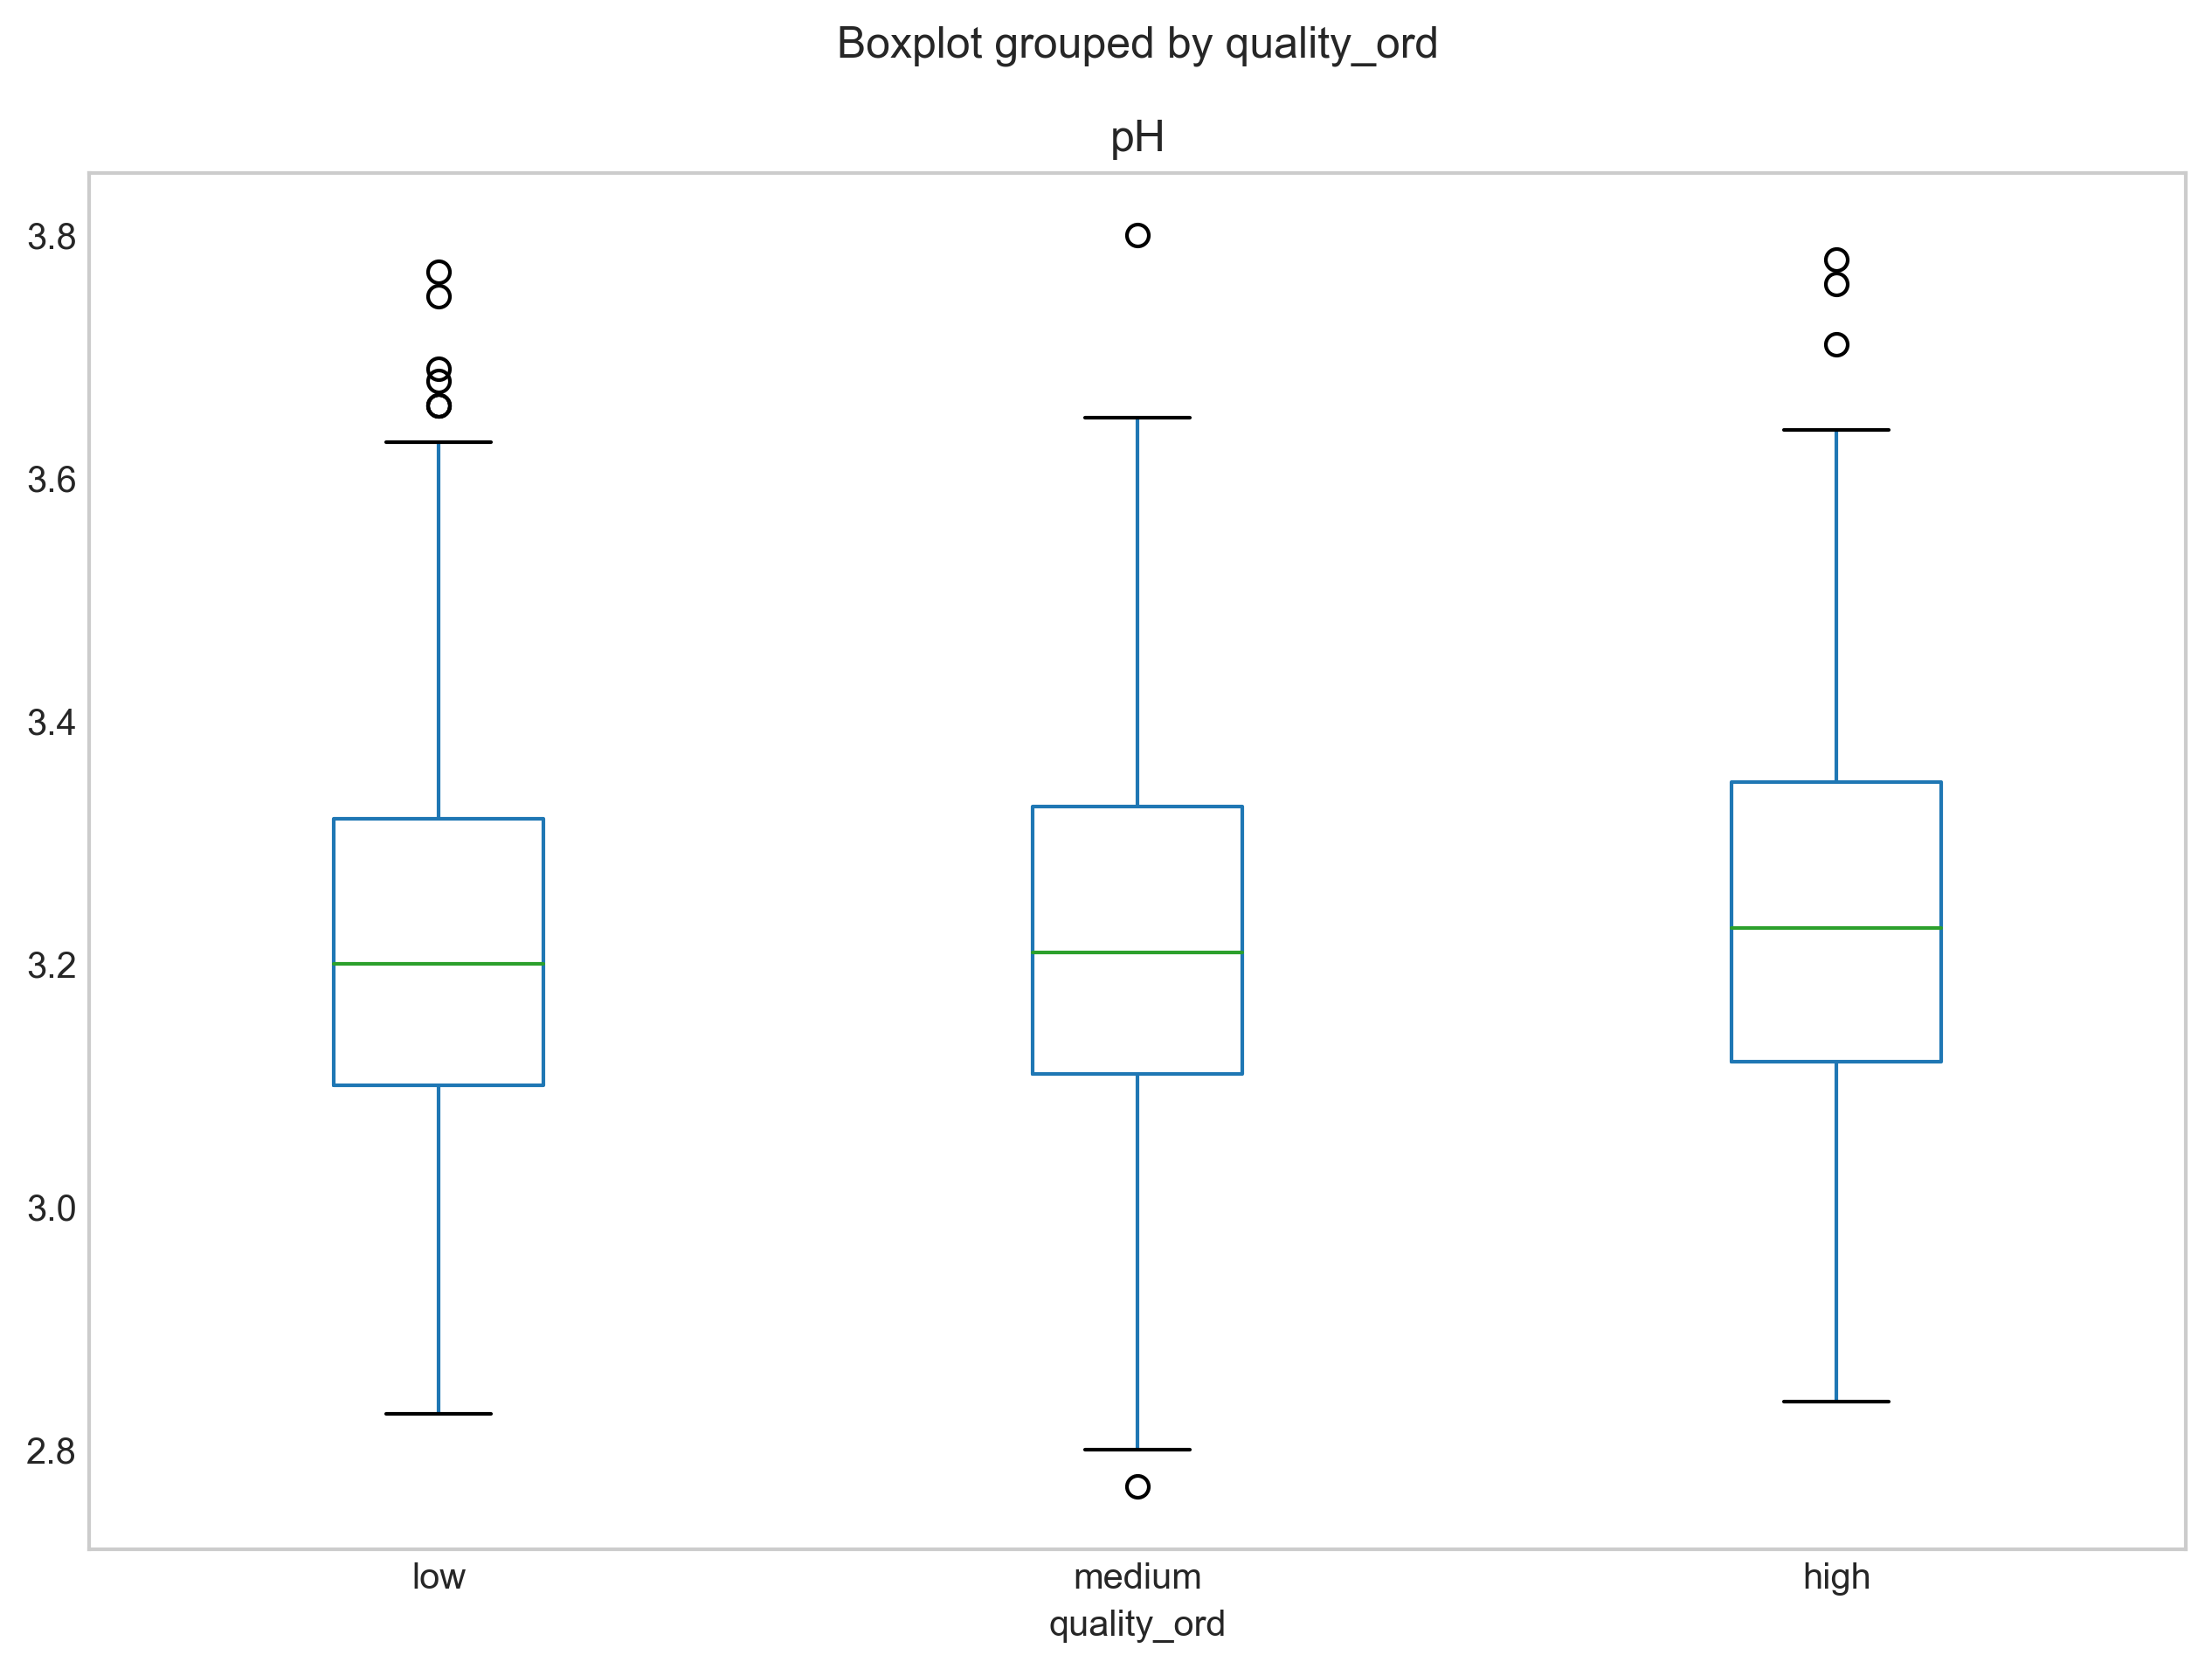

In [64]:
df.boxplot(column = dv, by = iv, figsize = (10,7), grid = False)

plt.show()

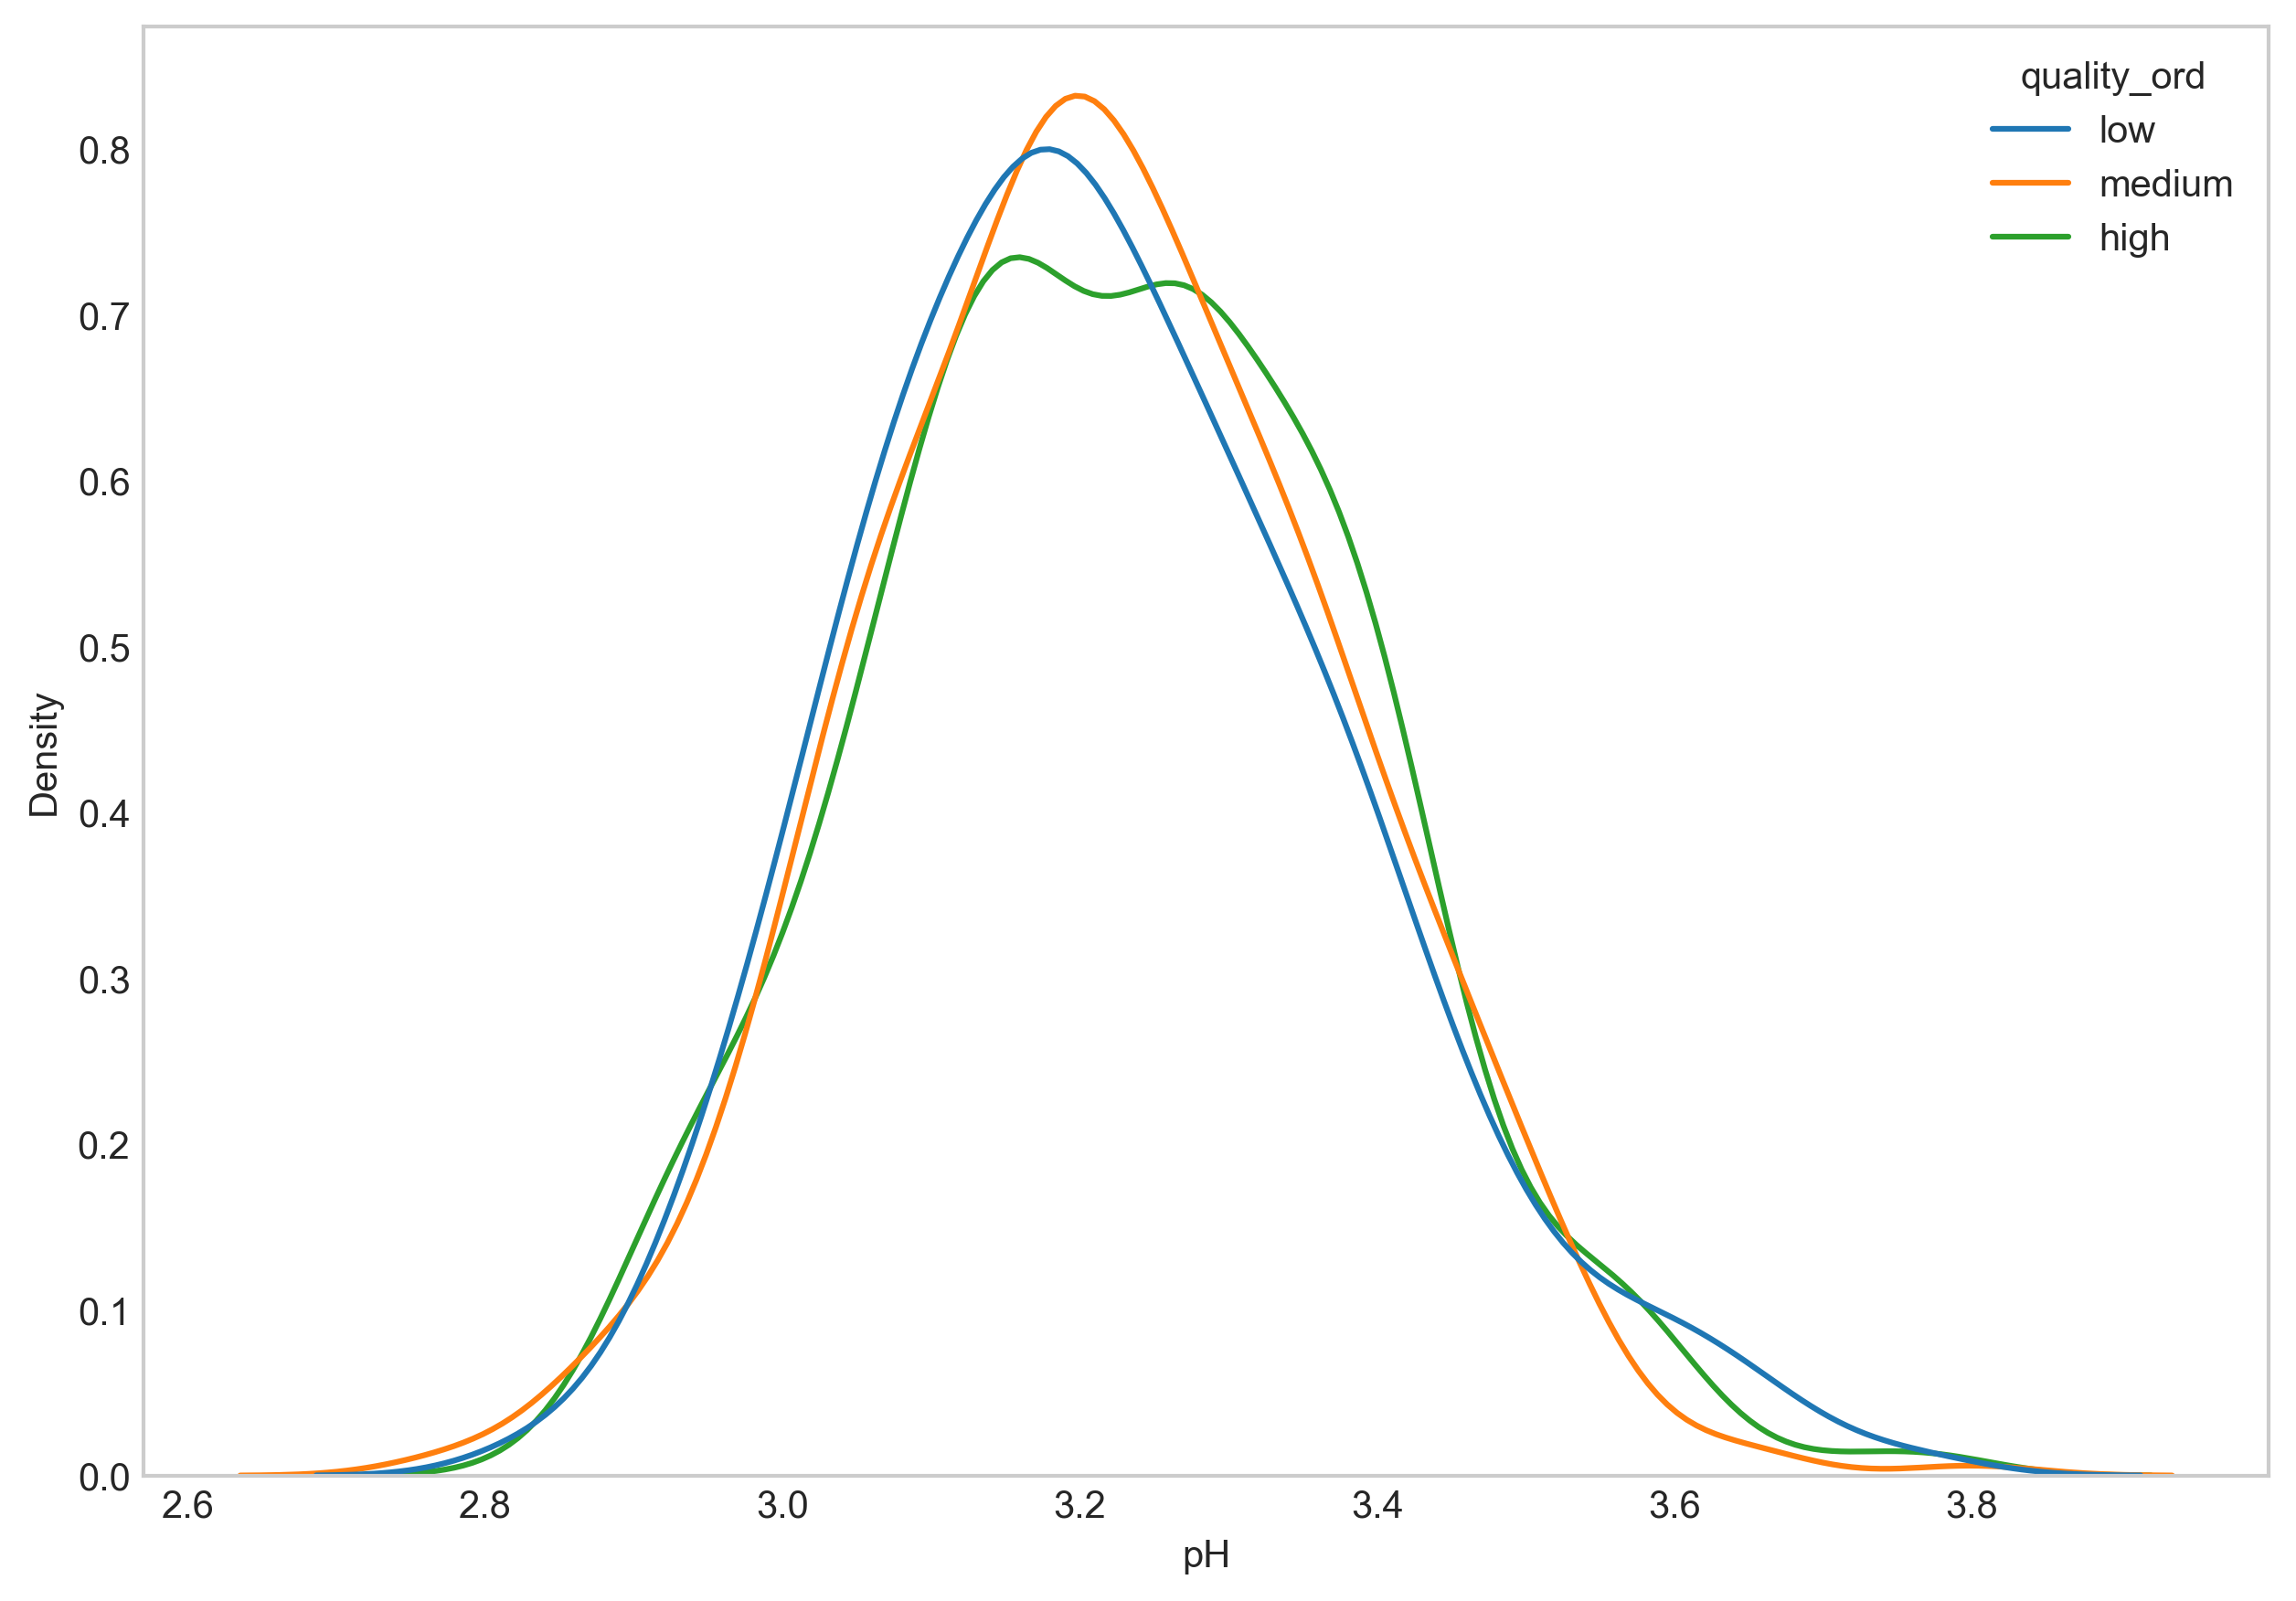

,W,pval,normal
low,0.984692,0.000041,False
medium,0.997350,0.608653,True
high,0.992888,0.017997,False


In [65]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.grid(False)

sns.kdeplot(data = df, x = dv, hue = iv, ax = ax)
plt.show()

pg.normality(df, dv = dv, group = iv, method = 'shapiro')

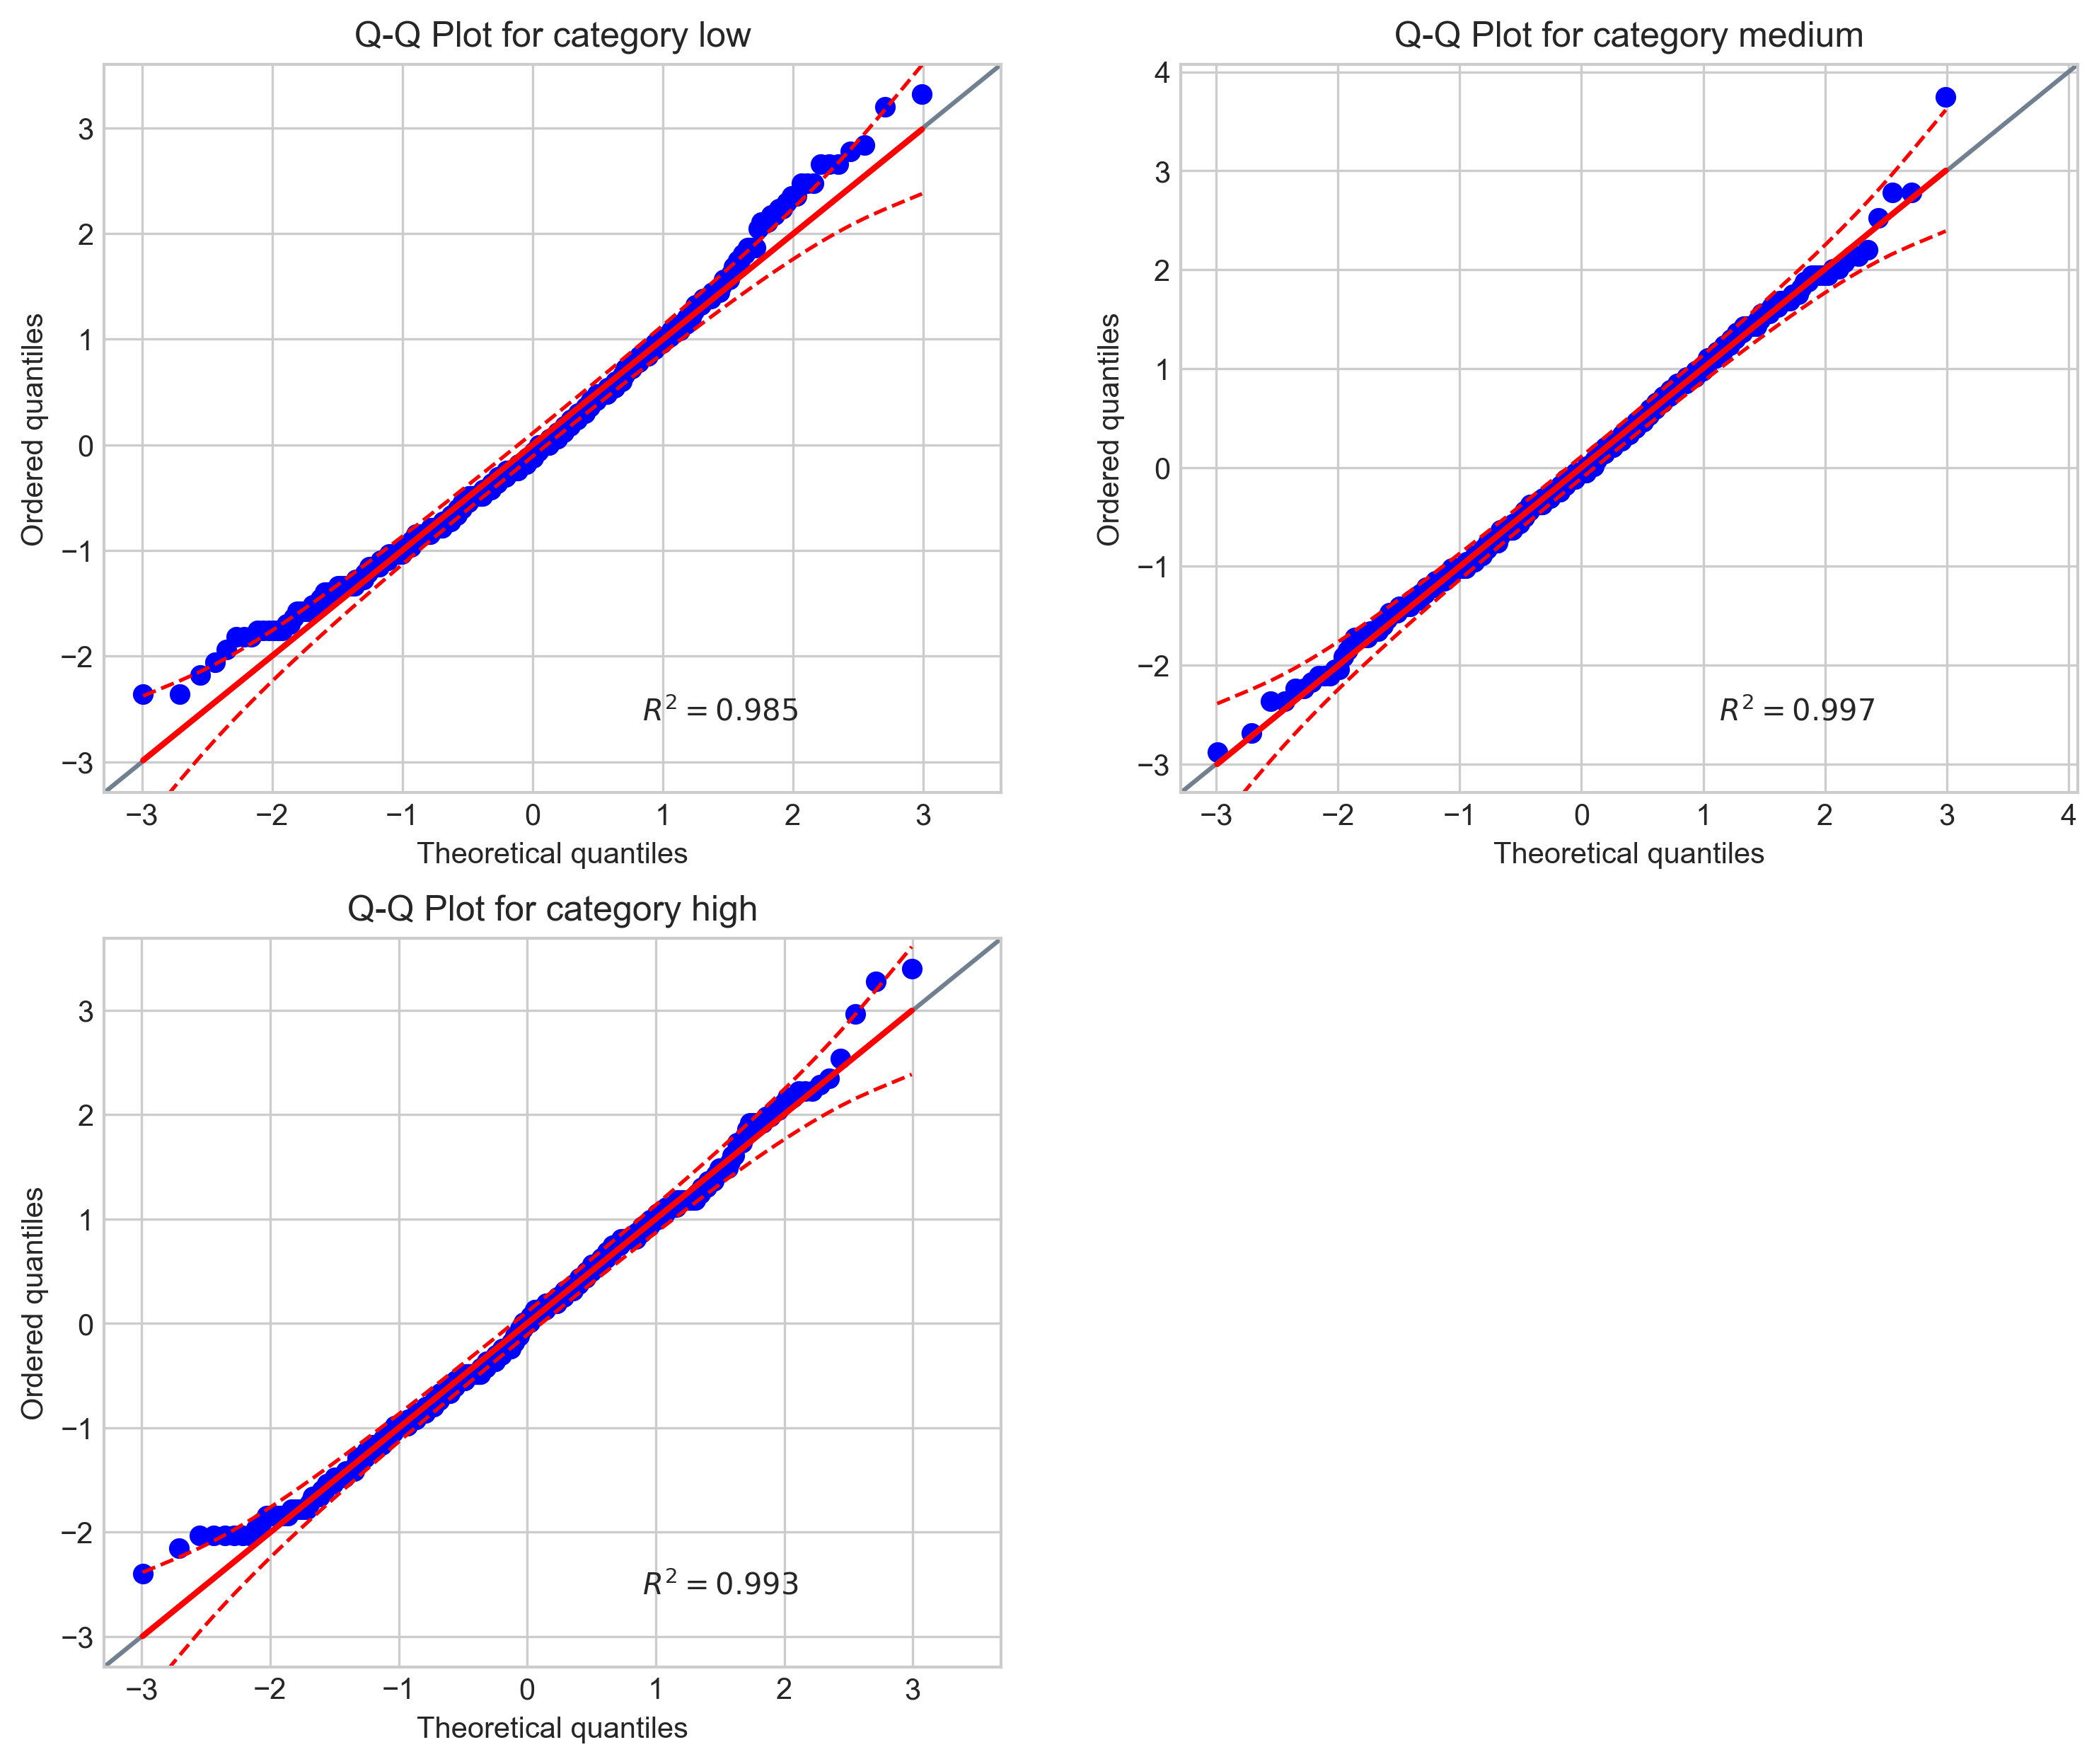

In [66]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
axes[1,1].set_axis_off()

categories = ['low', 'medium', 'high']

for ax, cat in zip(axes.flatten(), categories):
    mask = df[iv] == cat
    sample = df.loc[mask, dv]
    pg.qqplot(sample, ax = ax)
    ax.set_title(f"Q-Q Plot for category {cat}")

In [69]:
pg.kruskal(df, dv = dv, between = iv)

,Source,ddof1,H,p-unc
Kruskal,quality_ord,2,1.656742,0.43676


In [70]:
pg.pairwise_tests(df, dv = dv, between = iv, parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,quality_ord,low,medium,False,False,123530.5,two-sided,0.747645,0.015917
1,quality_ord,low,high,False,False,119415.0,two-sided,0.221276,-0.051293
2,quality_ord,medium,high,False,False,120705.0,two-sided,0.346910,-0.069039
